<a href="https://colab.research.google.com/github/Baananou/Data-Preprocessing-EDA/blob/main/Student_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
# data wrangling
import numpy as np
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing missing data
import missingno as msno

# surpress warning
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Read the CSV file
df = pd.read_csv('/content/StudentsPerformance.csv')

In [ ]:
# Display first few rows of DataFrame 'df'
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
# Check and display missing values count in each column
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [ ]:
# Get categorical columns and print unique values count for each
categorical = df.select_dtypes(['category', 'object']).columns

for col in categorical:
    print('{} : {} unique value(s)'.format(col, df[col].nunique()))

print('\n-------------\n')

# Print unique values for each categorical column
for col in categorical:
    print('{} : {}'.format(col, ', '.join(df[col].unique())))


gender : 2 unique value(s)
race/ethnicity : 5 unique value(s)
parental level of education : 6 unique value(s)
lunch : 2 unique value(s)
test preparation course : 2 unique value(s)

-------------

gender : female, male
race/ethnicity : group B, group C, group A, group D, group E
parental level of education : bachelor's degree, some college, master's degree, associate's degree, high school, some high school
lunch : standard, free/reduced
test preparation course : none, completed


In [ ]:
# Generate descriptive statistics for numerical columns in DataFrame 'df'
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
# Calculate final score
df['final score'] = df.apply(lambda x: (x['math score'] + x['reading score'] + x['writing score']) / 3, axis=1)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,final score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [ ]:
# Assign grades based on final score
df['grade'] = df['final score'].apply(lambda x: 'A' if x >= 90 else 'AB' if x >= 80 else 'B' if x >= 70 else 'BC' if x >= 60 else 'C' if x >= 50 else 'D' if x >= 40 else 'F')
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,final score,grade
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,B
1,female,group C,some college,standard,completed,69,90,88,82.333333,AB
2,female,group B,master's degree,standard,none,90,95,93,92.666667,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,D
4,male,group C,some college,standard,none,76,78,75,76.333333,B


In [ ]:
# Define a function to determine exam status
def pass_or_not(grade):
    if grade in ['A', 'AB', 'AB', 'B', 'BC']: return 'pass'
    if grade in ['C', 'D']: return 'remedy'
    else: return 'fail'

# Add exam status column to the DataFrame
df['exam status'] = df.apply(lambda x: pass_or_not(x['grade']), axis=1)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,final score,grade,exam status
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,B,pass
1,female,group C,some college,standard,completed,69,90,88,82.333333,AB,pass
2,female,group B,master's degree,standard,none,90,95,93,92.666667,A,pass
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,D,remedy
4,male,group C,some college,standard,none,76,78,75,76.333333,B,pass


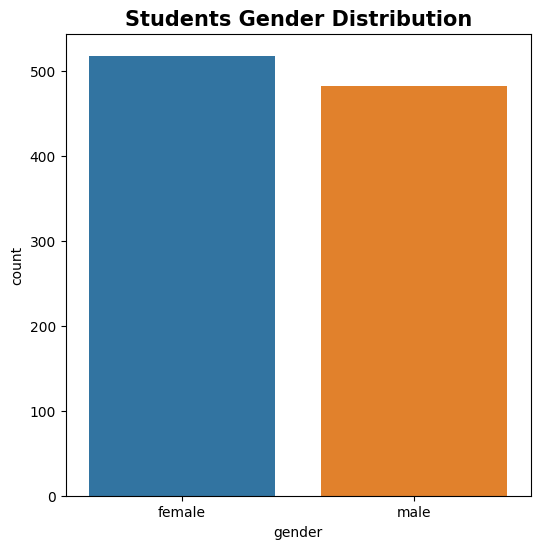

total male students: 482
total female students: 518


In [ ]:
# Plot gender distribution
plt.figure(figsize=(6,6))
sns.countplot(data=df, x='gender')
plt.title('Students Gender Distribution', fontsize=15, fontweight='bold')
plt.show()

# Display total male and female students
print('total male students: {}'.format(len(df[df.gender == 'male'])))
print('total female students: {}'.format(len(df[df.gender == 'female'])))

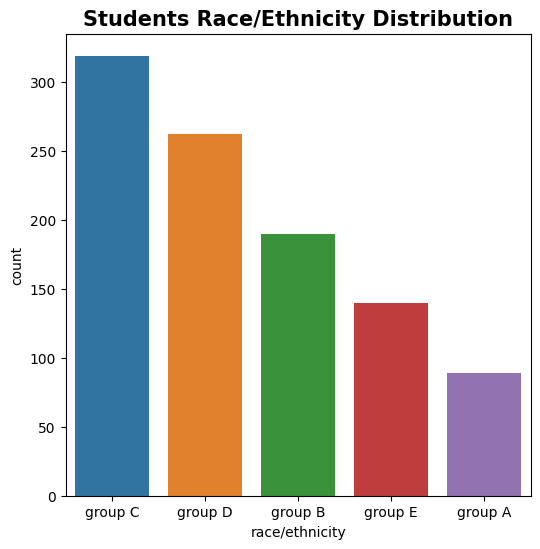

total group C students: 319
total group D students: 262
total group B students: 190
total group E students: 140
total group A students: 89


In [ ]:
# Plot race/ethnicity distribution
plt.figure(figsize=(6,6))
sns.countplot(data=df, x='race/ethnicity', order=df['race/ethnicity'].value_counts().index)
plt.title('Students Race/Ethnicity Distribution', fontsize=15, fontweight='bold')
plt.show()

# Display total students in each race/ethnicity category
ethnic = list(df['race/ethnicity'].value_counts().index)
for e in ethnic:
    print('total {} students: {}'.format(e, len(df[df['race/ethnicity'] == e])))

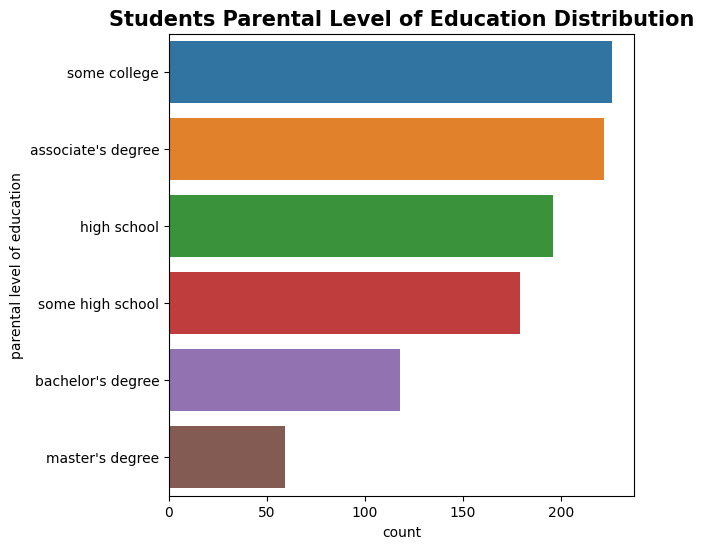

total students with parent level of education some college: 226
total students with parent level of education associate's degree: 222
total students with parent level of education high school: 196
total students with parent level of education some high school: 179
total students with parent level of education bachelor's degree: 118
total students with parent level of education master's degree: 59


In [ ]:
# Plot parental level of education distribution
plt.figure(figsize=(6,6))
sns.countplot(data=df, y='parental level of education', order=df['parental level of education'].value_counts().index)
plt.title('Students Parental Level of Education Distribution', fontsize=15, fontweight='bold')
plt.show()

# Display total students in each parental level of education category
education = list(df['parental level of education'].value_counts().index)
for e in education:
    print('total students with parent level of education {}: {}'.format(e, len(df[df['parental level of education'] == e])))

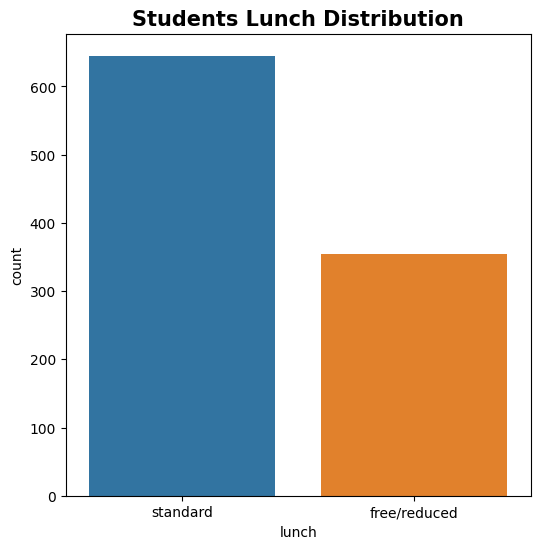

total students with standard lunch: 645
total students with free/reduced lunch: 355


In [ ]:
# Plot lunch distribution
plt.figure(figsize=(6,6))
sns.countplot(data=df, x='lunch')
plt.title('Students Lunch Distribution', fontsize=15, fontweight='bold')
plt.show()

# Display total students with standard and free/reduced lunch
print('total students with standard lunch: {}'.format(len(df[df.lunch == 'standard'])))
print('total students with free/reduced lunch: {}'.format(len(df[df.lunch == 'free/reduced'])))

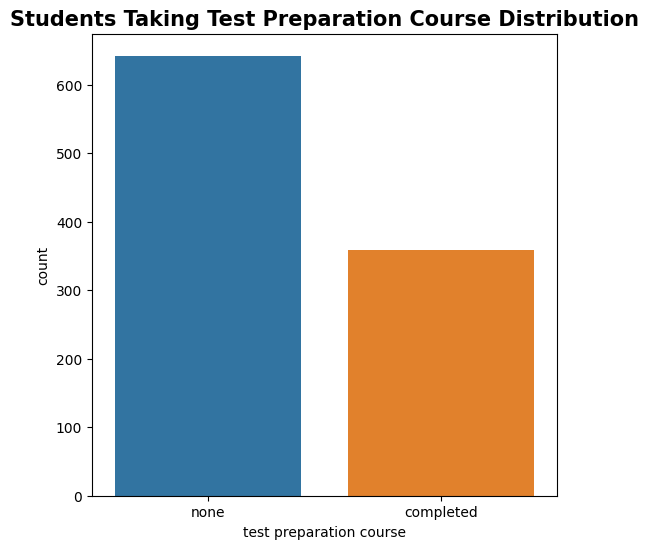

total students not taking test preparation course: 642
total students taking test preparation course: 358


In [ ]:
# Plot test preparation course distribution
plt.figure(figsize=(6,6))
sns.countplot(data=df, x='test preparation course')
plt.title('Students Taking Test Preparation Course Distribution', fontsize=15, fontweight='bold')
plt.show()

# Display total students not taking and taking test preparation course
print('total students not taking test preparation course: {}'.format(len(df[df['test preparation course'] == 'none'])))
print('total students taking test preparation course: {}'.format(len(df[df['test preparation course'] == 'completed'])))

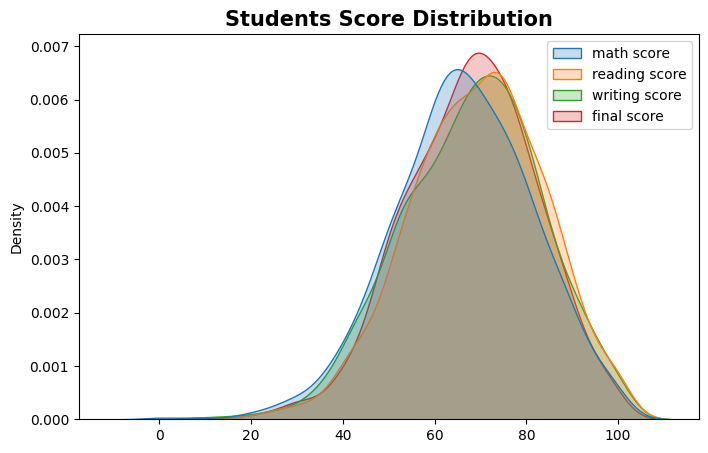

average math score: 66.089
average reading score: 69.169
average writing score: 68.054
average final score: 67.77066666666666


In [ ]:
# Plot overall score distribution
plt.figure(figsize=(8,5))
sns.kdeplot(data=df, shade=True)
plt.title('Students Score Distribution', fontsize=15, fontweight='bold')
plt.show()

# Display average scores
print('average math score: {}'.format(df['math score'].mean()))
print('average reading score: {}'.format(df['reading score'].mean()))
print('average writing score: {}'.format(df['writing score'].mean()))
print('average final score: {}'.format(df['final score'].mean()))

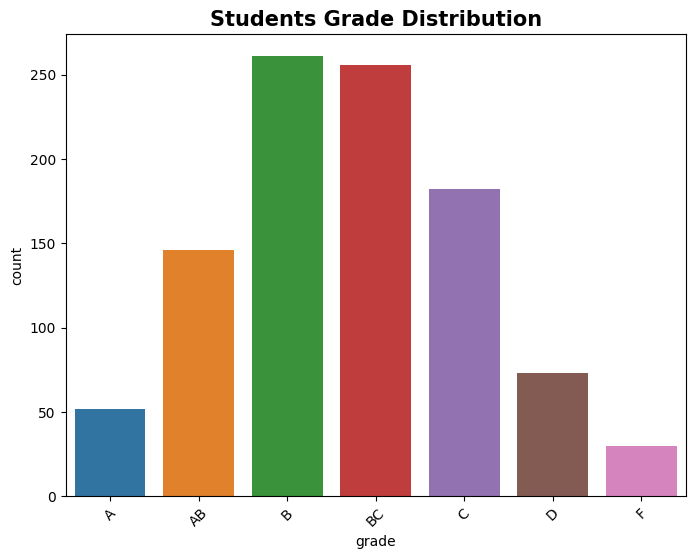

Total students with grade A: 52
Total students with grade AB: 146
Total students with grade B: 261
Total students with grade BC: 256
Total students with grade C: 182
Total students with grade D: 73
Total students with grade F: 30


In [ ]:
# Check if 'grade' column exists in the DataFrame
if 'grade' in df.columns:
    # Plot grade distribution
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x='grade', order=df['grade'].sort_values().unique())
    plt.title('Students Grade Distribution', fontsize=15, fontweight='bold')
    plt.xticks(rotation=45)
    plt.show()

    # Display total students with each grade
    grades = list(df['grade'].sort_values().unique())
    for g in grades:
        print('Total students with grade {}: {}'.format(g, len(df[df['grade'] == g])))
else:
    print("Error: 'grade' column not found in the DataFrame.")

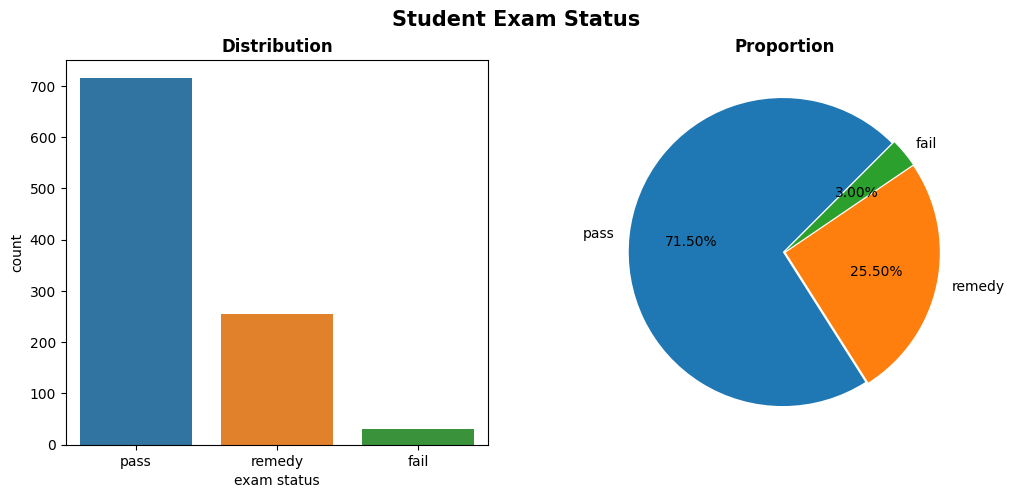

total students pass in exam: 715
total students remedy in exam: 255
total students fail in exam: 30


In [ ]:
# Visualize exam status
fig, ax = plt.subplots(1,2, figsize=(12,5))
fig.suptitle('Student Exam Status', fontsize=15, fontweight='bold')

# student exam status distribution
sns.countplot(ax=ax[0], data=df, x='exam status')
ax[0].set_title('Distribution', fontweight='bold')

# student exam status proportion
ax[1].pie(df['exam status'].value_counts(), labels=df['exam status'].unique(), \
        autopct='%1.2f%%', startangle=45, explode=[0.01,0.01, 0.01])
ax[1].set_title('Proportion', fontweight='bold')

plt.show()

# Display total students with each exam status
exams = df['exam status'].unique()
for e in exams:
    print('total students {} in exam: {}'.format(e, len(df[df['exam status'] == e])))

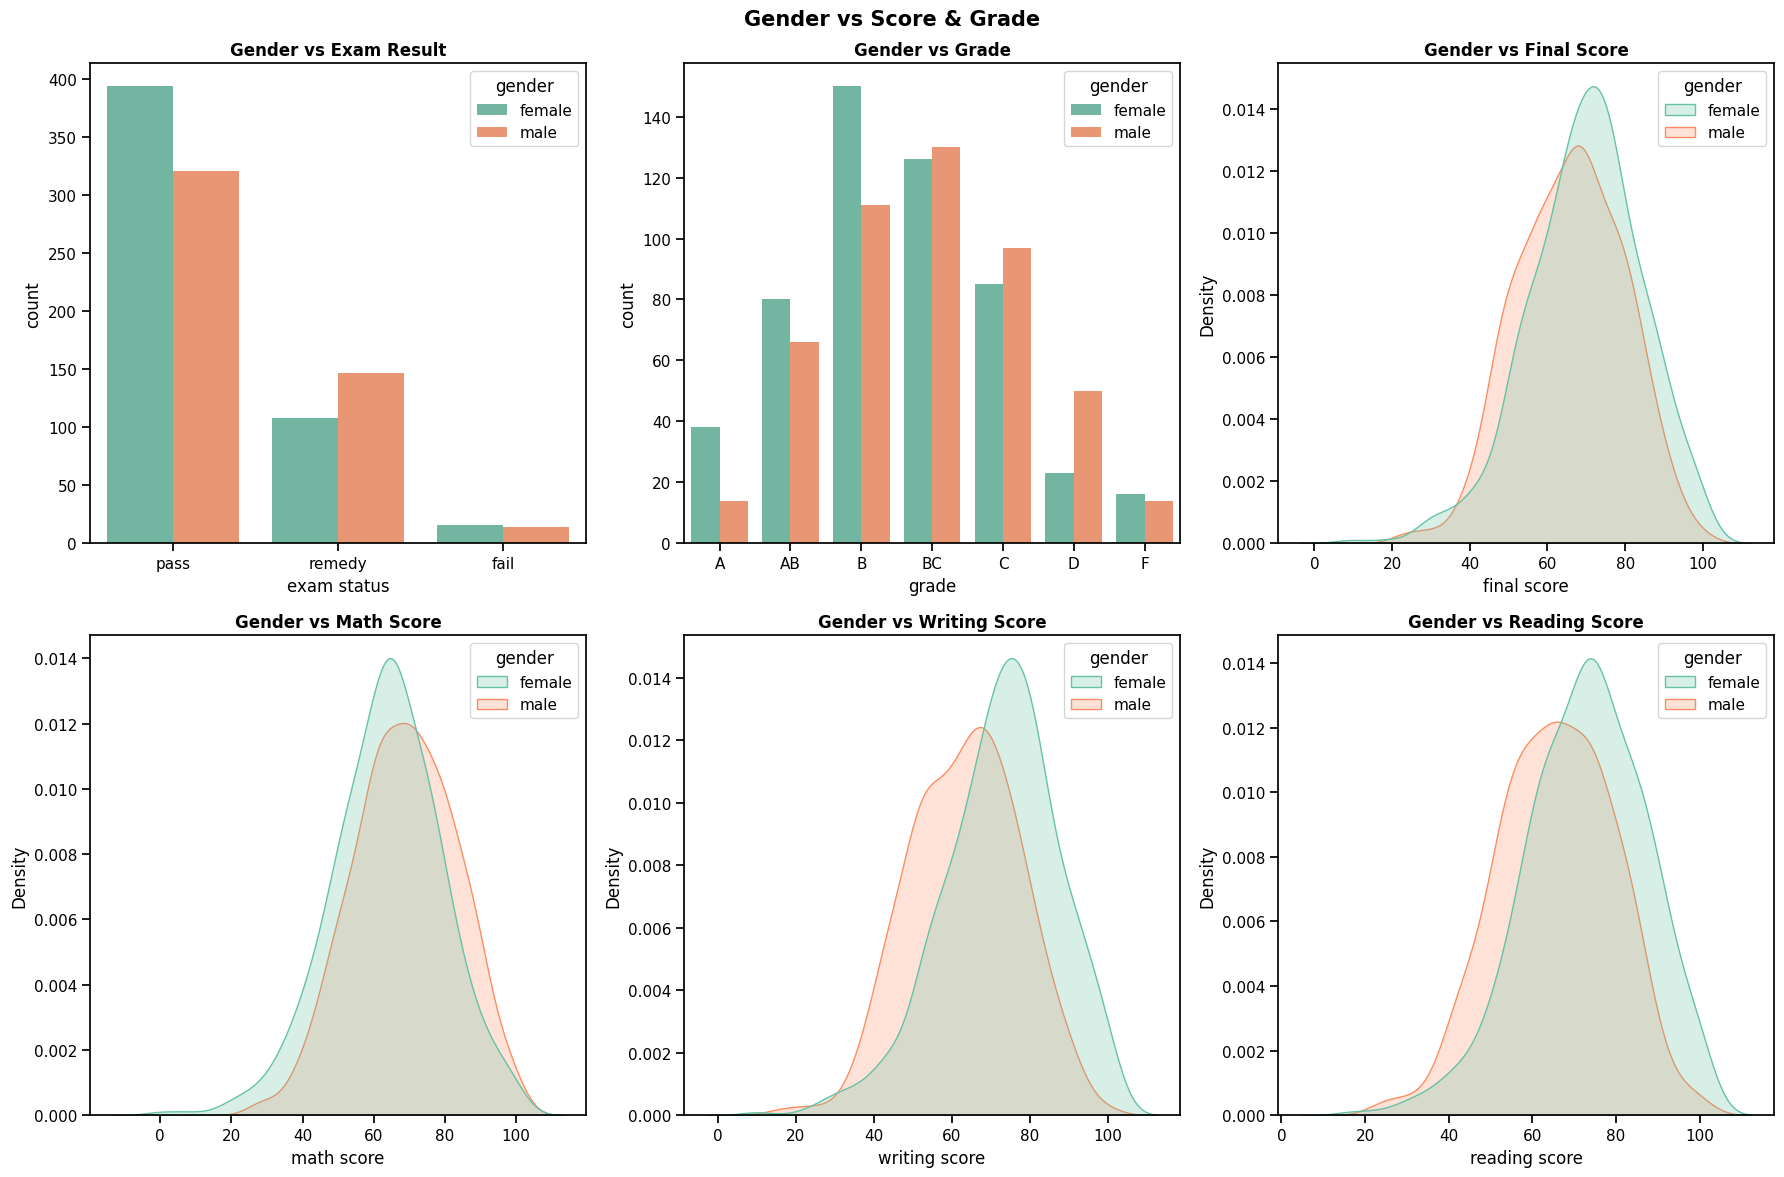

In [ ]:
# visualize data using plt.subplot()
plt.figure(figsize=(18,12))
plt.suptitle('Gender vs Score & Grade', fontweight='bold', fontsize=15)

# gender vs exam result
plt.subplot(231)
sns.countplot(data=df, x='exam status', hue='gender')
plt.title('Gender vs Exam Result', fontweight='bold')

# gender vs grade
plt.subplot(232)
sns.countplot(data=df, x='grade', hue='gender', order=df['grade'].sort_values().unique())
plt.title('Gender vs Grade', fontweight='bold')

# gender vs final score
plt.subplot(233)
sns.kdeplot(data=df, x='final score', hue='gender', shade=True)
plt.title('Gender vs Final Score', fontweight='bold')

# gender vs math score
plt.subplot(234)
sns.kdeplot(data=df, x='math score', hue='gender', shade=True)
plt.title('Gender vs Math Score', fontweight='bold')

# gender vs writing score
plt.subplot(235)
sns.kdeplot(data=df, x='writing score', hue='gender', shade=True)
plt.title('Gender vs Writing Score', fontweight='bold')

# gender vs reading score
plt.subplot(236)
sns.kdeplot(data=df, x='reading score', hue='gender', shade=True)
plt.title('Gender vs Reading Score', fontweight='bold')

plt.tight_layout()
plt.show()

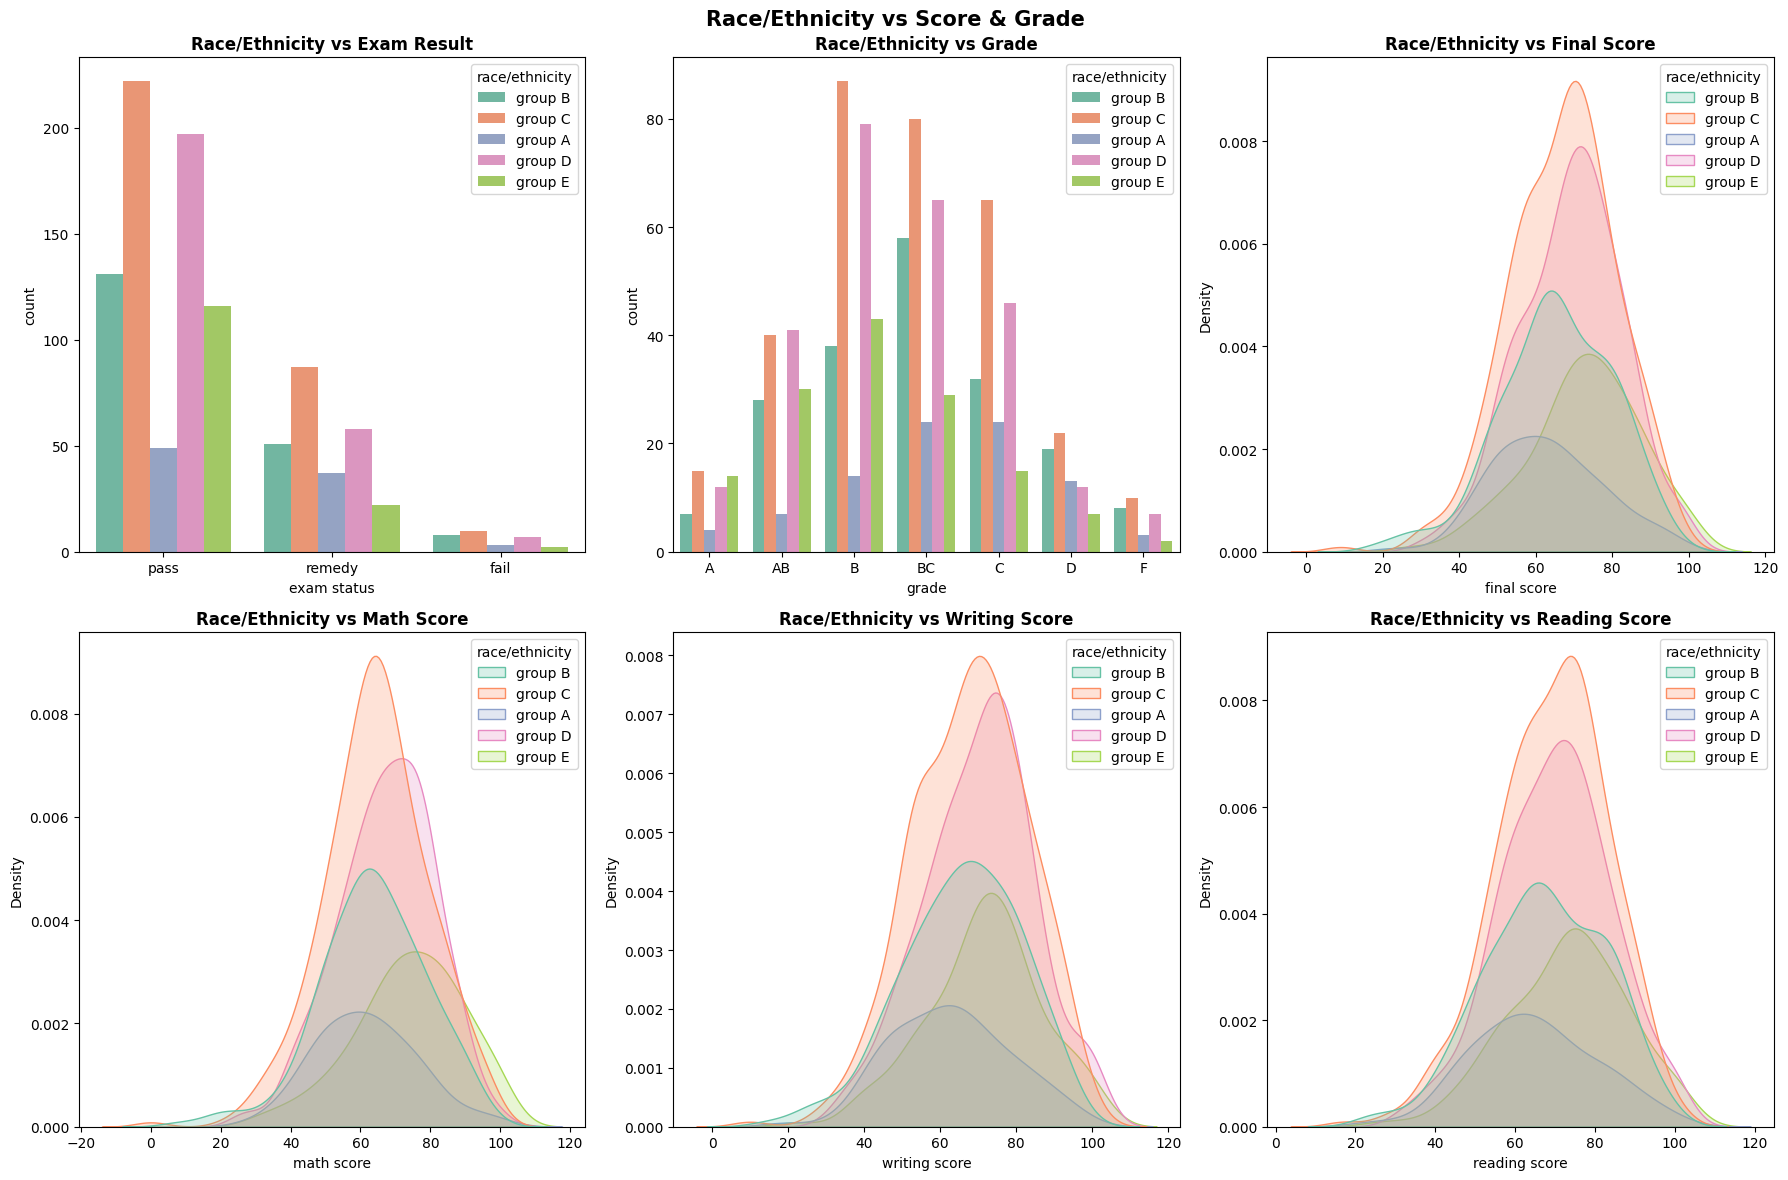

In [ ]:
sns.set_palette("Set2")
# Race/Ethnicity vs Score & Grade
plt.figure(figsize=(18,12))
plt.suptitle('Race/Ethnicity vs Score & Grade', fontweight='bold', fontsize=15)

# Race/Ethnicity vs Exam Result
plt.subplot(231)
sns.countplot(data=df, x='exam status', hue='race/ethnicity')
plt.title('Race/Ethnicity vs Exam Result', fontweight='bold')

# Race/Ethnicity vs Grade
plt.subplot(232)
sns.countplot(data=df, x='grade', hue='race/ethnicity', order=df['grade'].sort_values().unique())
plt.title('Race/Ethnicity vs Grade', fontweight='bold')

# Race/Ethnicity vs Final Score
plt.subplot(233)
sns.kdeplot(data=df, x='final score', hue='race/ethnicity', shade=True)
plt.title('Race/Ethnicity vs Final Score', fontweight='bold')

# Race/Ethnicity vs Math Score
plt.subplot(234)
sns.kdeplot(data=df, x='math score', hue='race/ethnicity', shade=True)
plt.title('Race/Ethnicity vs Math Score', fontweight='bold')

# Race/Ethnicity vs Writing Score
plt.subplot(235)
sns.kdeplot(data=df, x='writing score', hue='race/ethnicity', shade=True)
plt.title('Race/Ethnicity vs Writing Score', fontweight='bold')

# Race/Ethnicity vs Reading Score
plt.subplot(236)
sns.kdeplot(data=df, x='reading score', hue='race/ethnicity', shade=True)
plt.title('Race/Ethnicity vs Reading Score', fontweight='bold')

plt.tight_layout()
plt.show()

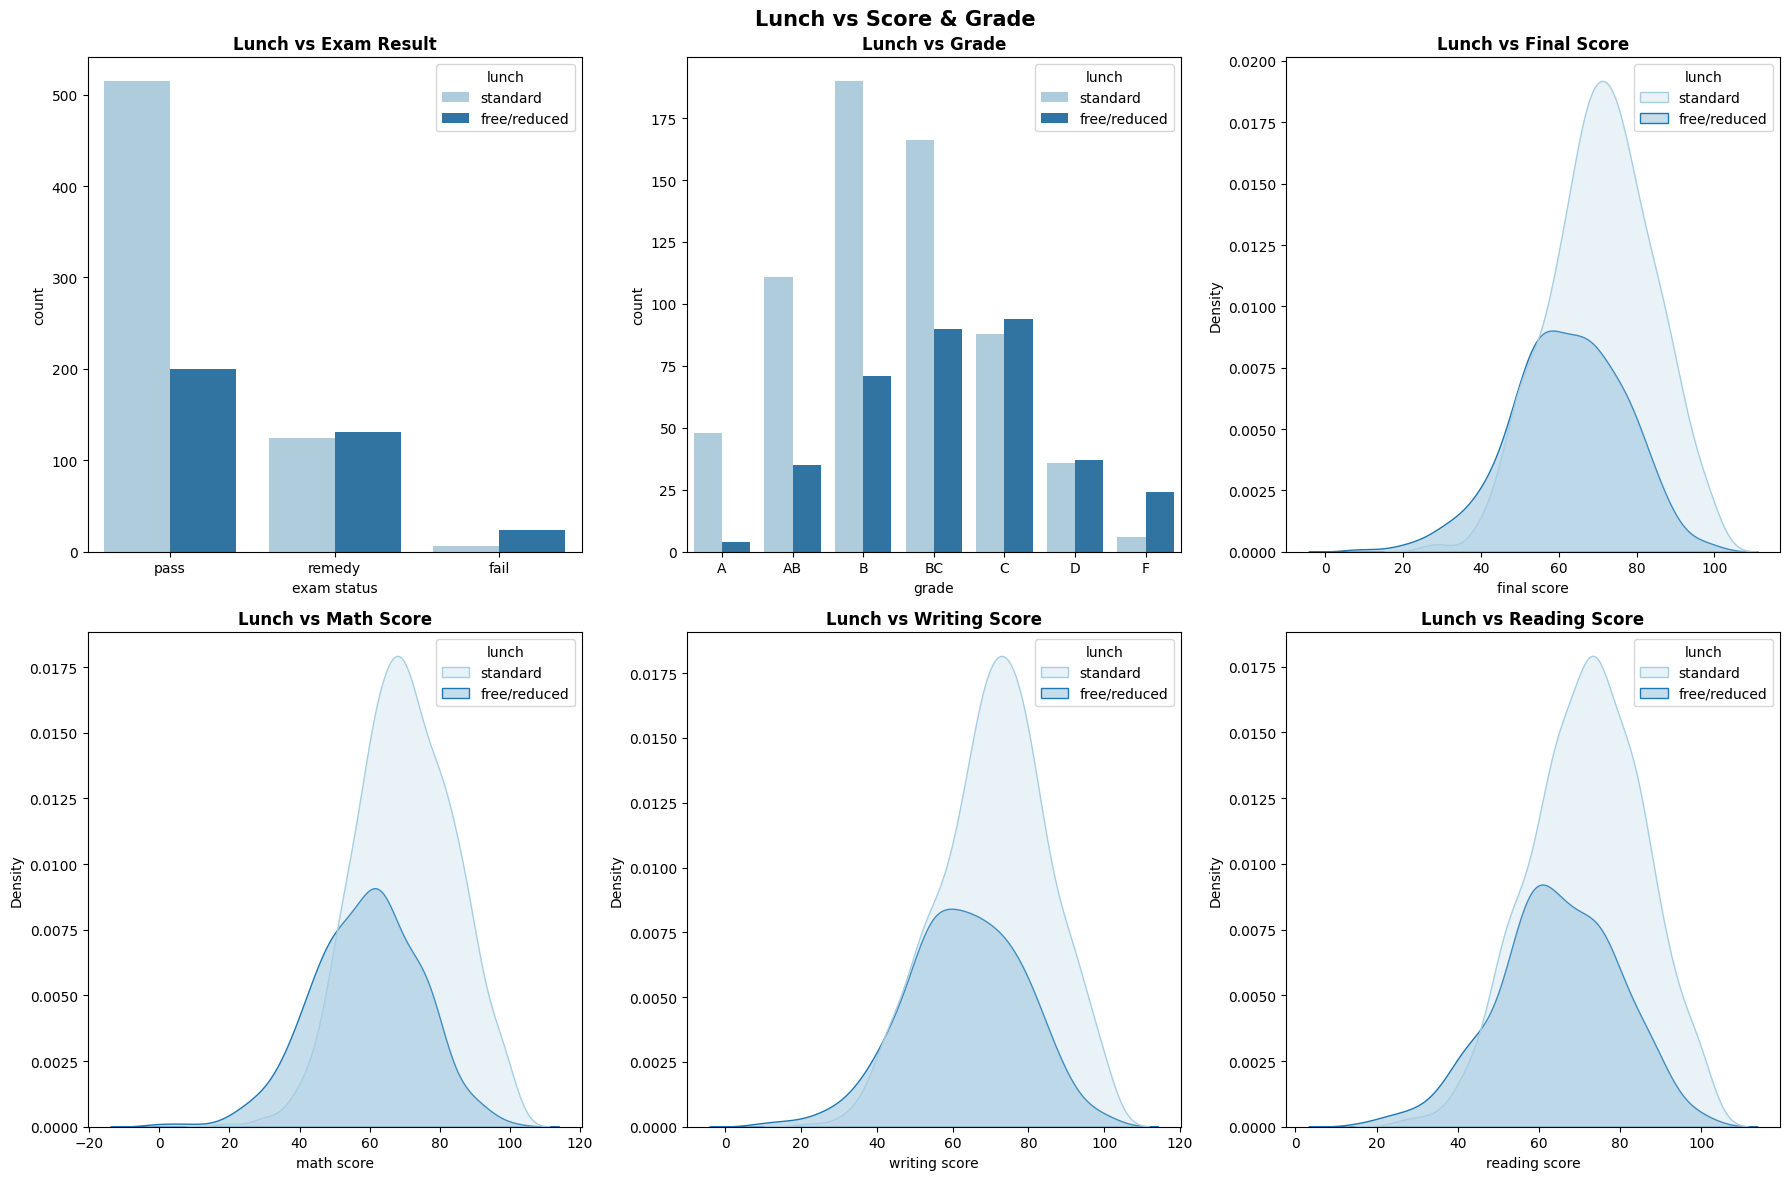

In [ ]:
sns.set_palette("Paired")
# Lunch vs Score & Grade
plt.figure(figsize=(18,12))
plt.suptitle('Lunch vs Score & Grade', fontweight='bold', fontsize=15)

# Lunch vs Exam Result
plt.subplot(231)
sns.countplot(data=df, x='exam status', hue='lunch')
plt.title('Lunch vs Exam Result', fontweight='bold')

# Lunch vs Grade
plt.subplot(232)
sns.countplot(data=df, x='grade', hue='lunch', order=df['grade'].sort_values().unique())
plt.title('Lunch vs Grade', fontweight='bold')

# Lunch vs Final Score
plt.subplot(233)
sns.kdeplot(data=df, x='final score', hue='lunch', shade=True)
plt.title('Lunch vs Final Score', fontweight='bold')

# Lunch vs Math Score
plt.subplot(234)
sns.kdeplot(data=df, x='math score', hue='lunch', shade=True)
plt.title('Lunch vs Math Score', fontweight='bold')

# Lunch vs Writing Score
plt.subplot(235)
sns.kdeplot(data=df, x='writing score', hue='lunch', shade=True)
plt.title('Lunch vs Writing Score', fontweight='bold')

# Lunch vs Reading Score
plt.subplot(236)
sns.kdeplot(data=df, x='reading score', hue='lunch', shade=True)
plt.title('Lunch vs Reading Score', fontweight='bold')

plt.tight_layout()
plt.show()

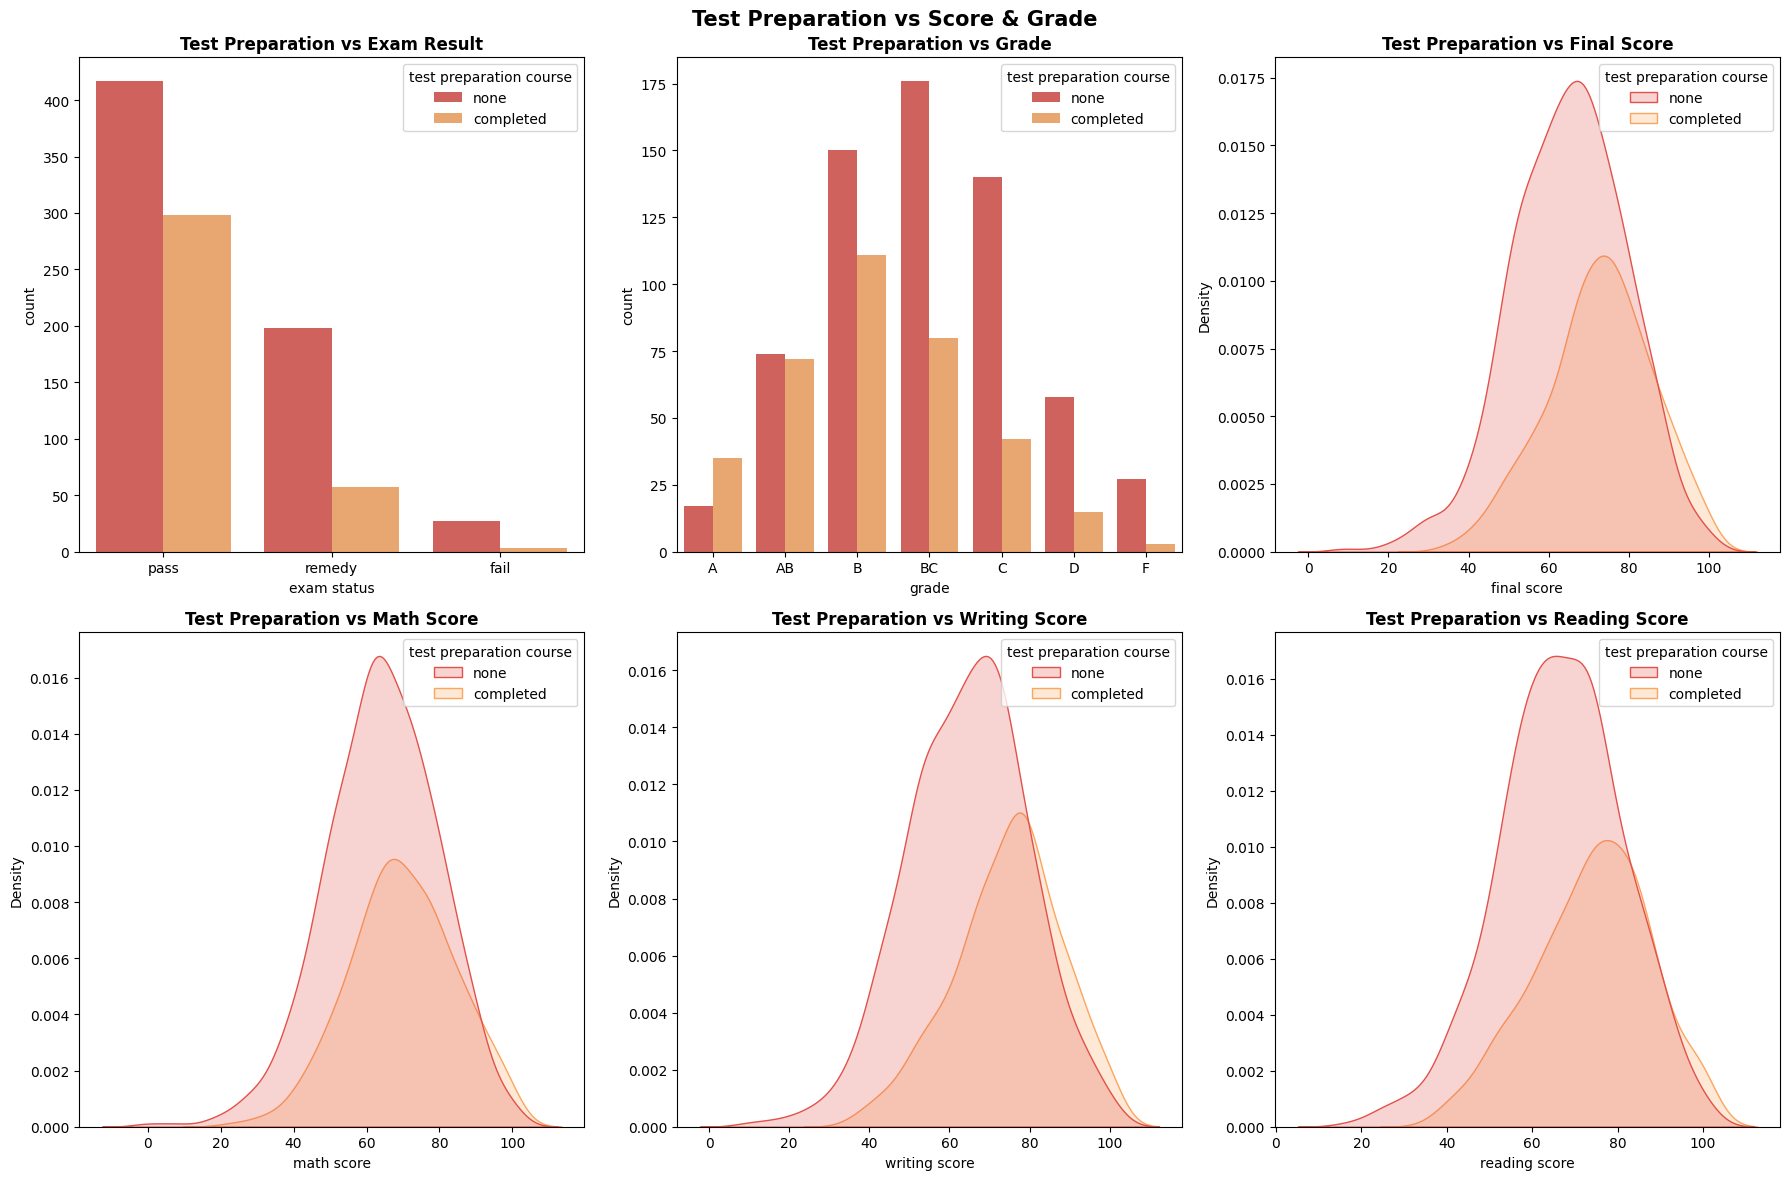

In [ ]:
sns.set_palette("Spectral")
# Test Preparation vs Score & Grade
plt.figure(figsize=(18,12))
plt.suptitle('Test Preparation vs Score & Grade', fontweight='bold', fontsize=15)

# Test Preparation vs Exam Result
plt.subplot(231)
sns.countplot(data=df, x='exam status', hue='test preparation course')
plt.title('Test Preparation vs Exam Result', fontweight='bold')

# Test Preparation vs Grade
plt.subplot(232)
sns.countplot(data=df, x='grade', hue='test preparation course', order=df['grade'].sort_values().unique())
plt.title('Test Preparation vs Grade', fontweight='bold')

# Test Preparation vs Final Score
plt.subplot(233)
sns.kdeplot(data=df, x='final score', hue='test preparation course', shade=True)
plt.title('Test Preparation vs Final Score', fontweight='bold')

# Test Preparation vs Math Score
plt.subplot(234)
sns.kdeplot(data=df, x='math score', hue='test preparation course', shade=True)
plt.title('Test Preparation vs Math Score', fontweight='bold')

# Test Preparation vs Writing Score
plt.subplot(235)
sns.kdeplot(data=df, x='writing score', hue='test preparation course', shade=True)
plt.title('Test Preparation vs Writing Score', fontweight='bold')

# Test Preparation vs Reading Score
plt.subplot(236)
sns.kdeplot(data=df, x='reading score', hue='test preparation course', shade=True)
plt.title('Test Preparation vs Reading Score', fontweight='bold')

plt.tight_layout()
plt.show()

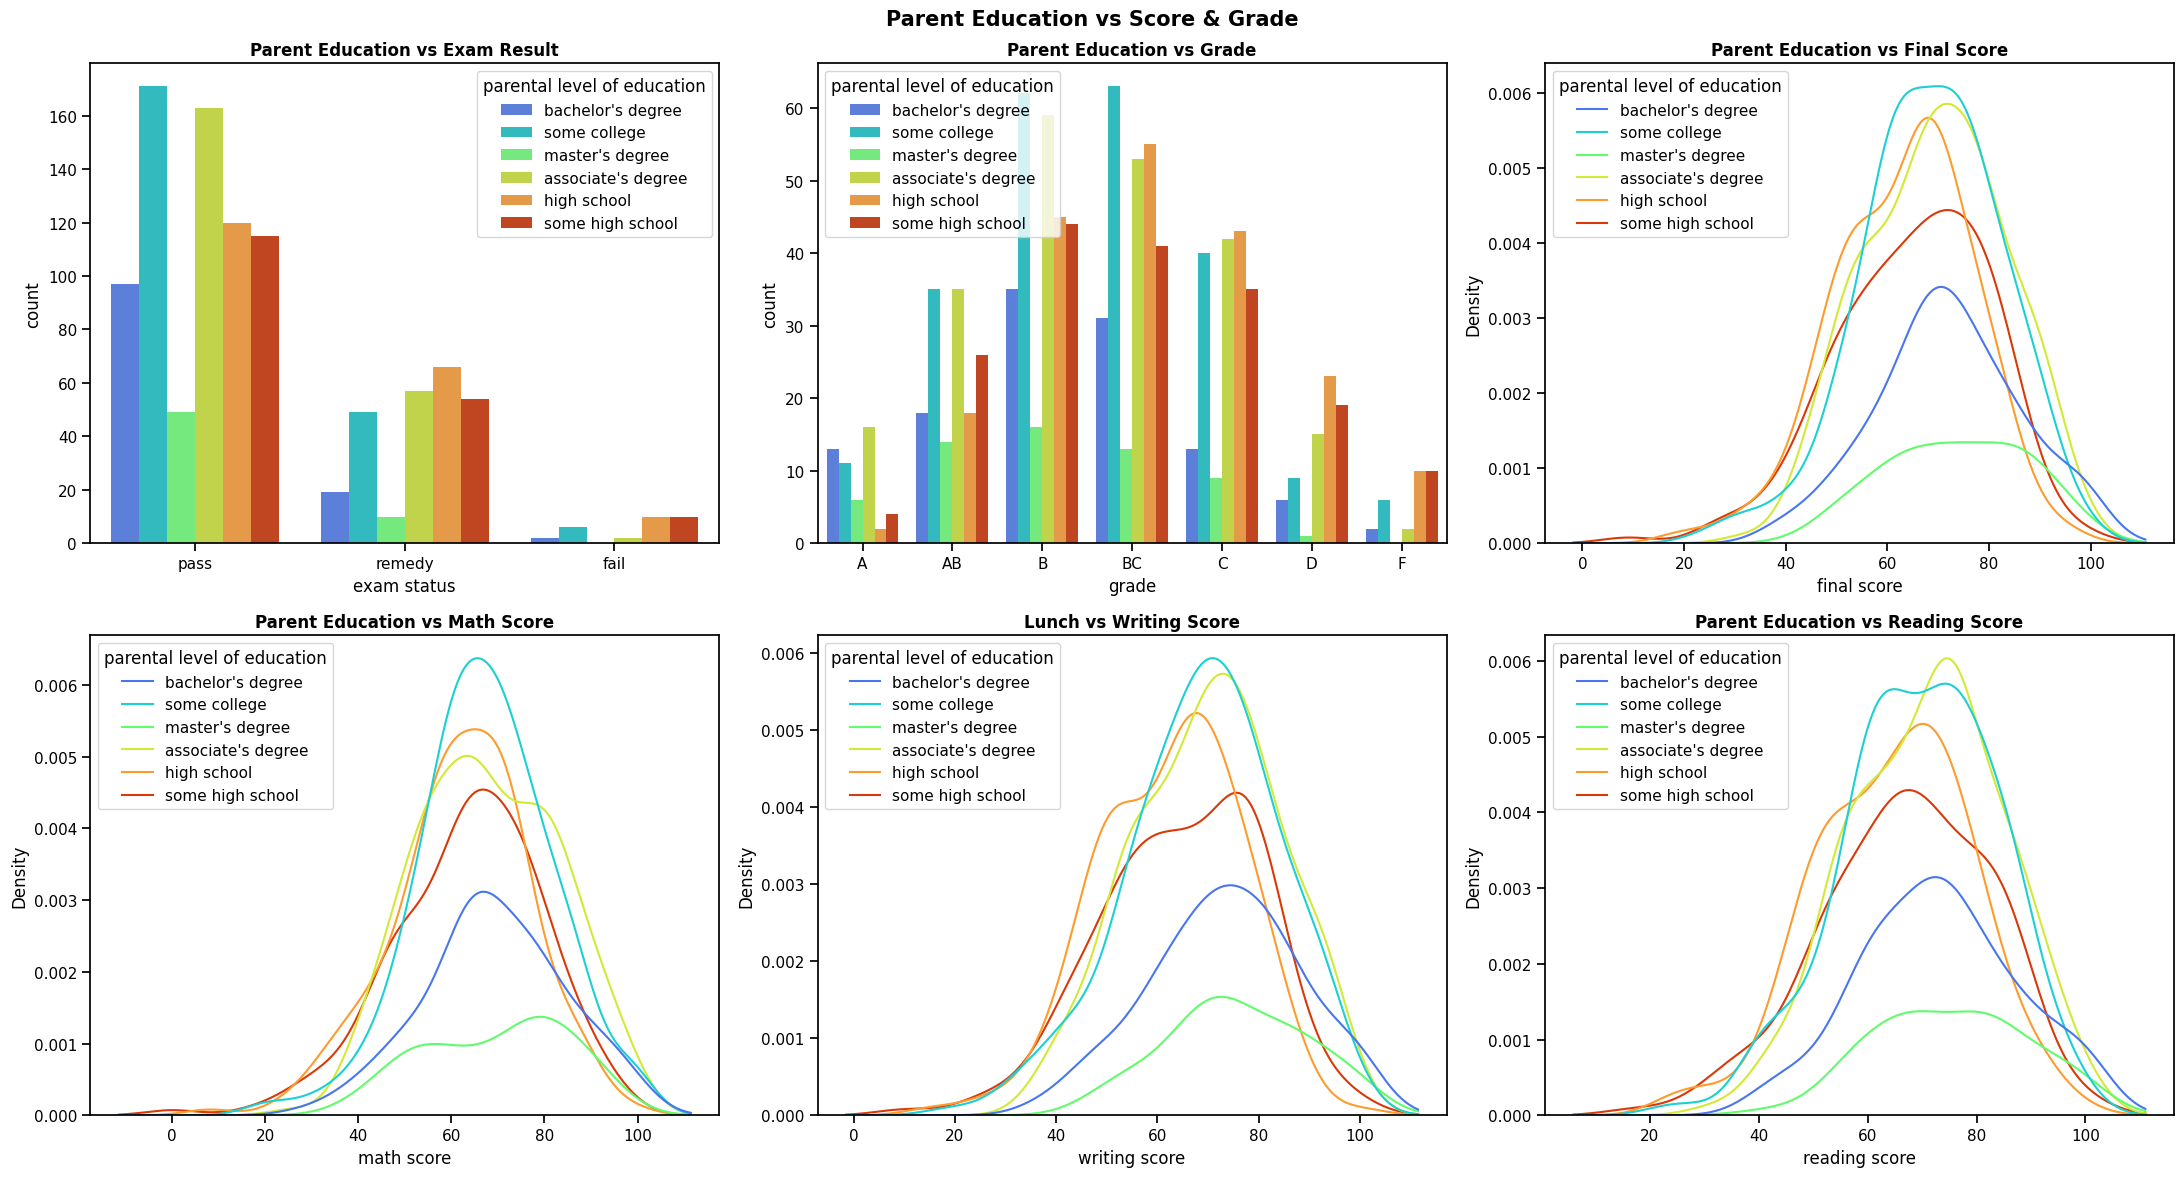

In [ ]:
sns.set_palette("turbo")
sns.set_context("notebook",font_scale=1)
# Parent Education vs Score & Grade
plt.figure(figsize=(22,12))
plt.suptitle('Parent Education vs Score & Grade', fontweight='bold', fontsize=15)

# Parent Education vs Exam Result
plt.subplot(231)
sns.countplot(data=df, x='exam status', hue='parental level of education')
plt.title('Parent Education vs Exam Result', fontweight='bold')

# Parent Education vs Grade
plt.subplot(232)
ax = sns.countplot(data=df, x='grade', hue='parental level of education', order=df['grade'].sort_values().unique())
ax.legend_._set_loc(2)
plt.title('Parent Education vs Grade', fontweight='bold')

# Parent Education vs Final Score
plt.subplot(233)
ax = sns.kdeplot(data=df, x='final score', hue='parental level of education', shade=False, common_grid=True)
ax.legend_._set_loc(2)
plt.title('Parent Education vs Final Score', fontweight='bold')


# Parent Education vs Math Score
plt.subplot(234)
ax = sns.kdeplot(data=df, x='math score', hue='parental level of education', shade=False, common_grid=True,)
ax.legend_._set_loc(2)
plt.title('Parent Education vs Math Score', fontweight='bold')

# Lunch vs Writing Score
plt.subplot(235)
ax = sns.kdeplot(data=df, x='writing score', hue='parental level of education', shade=False, common_grid=True,)
ax.legend_._set_loc(2)
plt.title('Lunch vs Writing Score', fontweight='bold')

# Parent Education vs Reading Score
plt.subplot(236)
ax = sns.kdeplot(data=df, x='reading score', hue='parental level of education', shade=False, common_grid=True,)
ax.legend_._set_loc(2)
plt.title('Parent Education vs Reading Score', fontweight='bold')

plt.tight_layout()
plt.show()

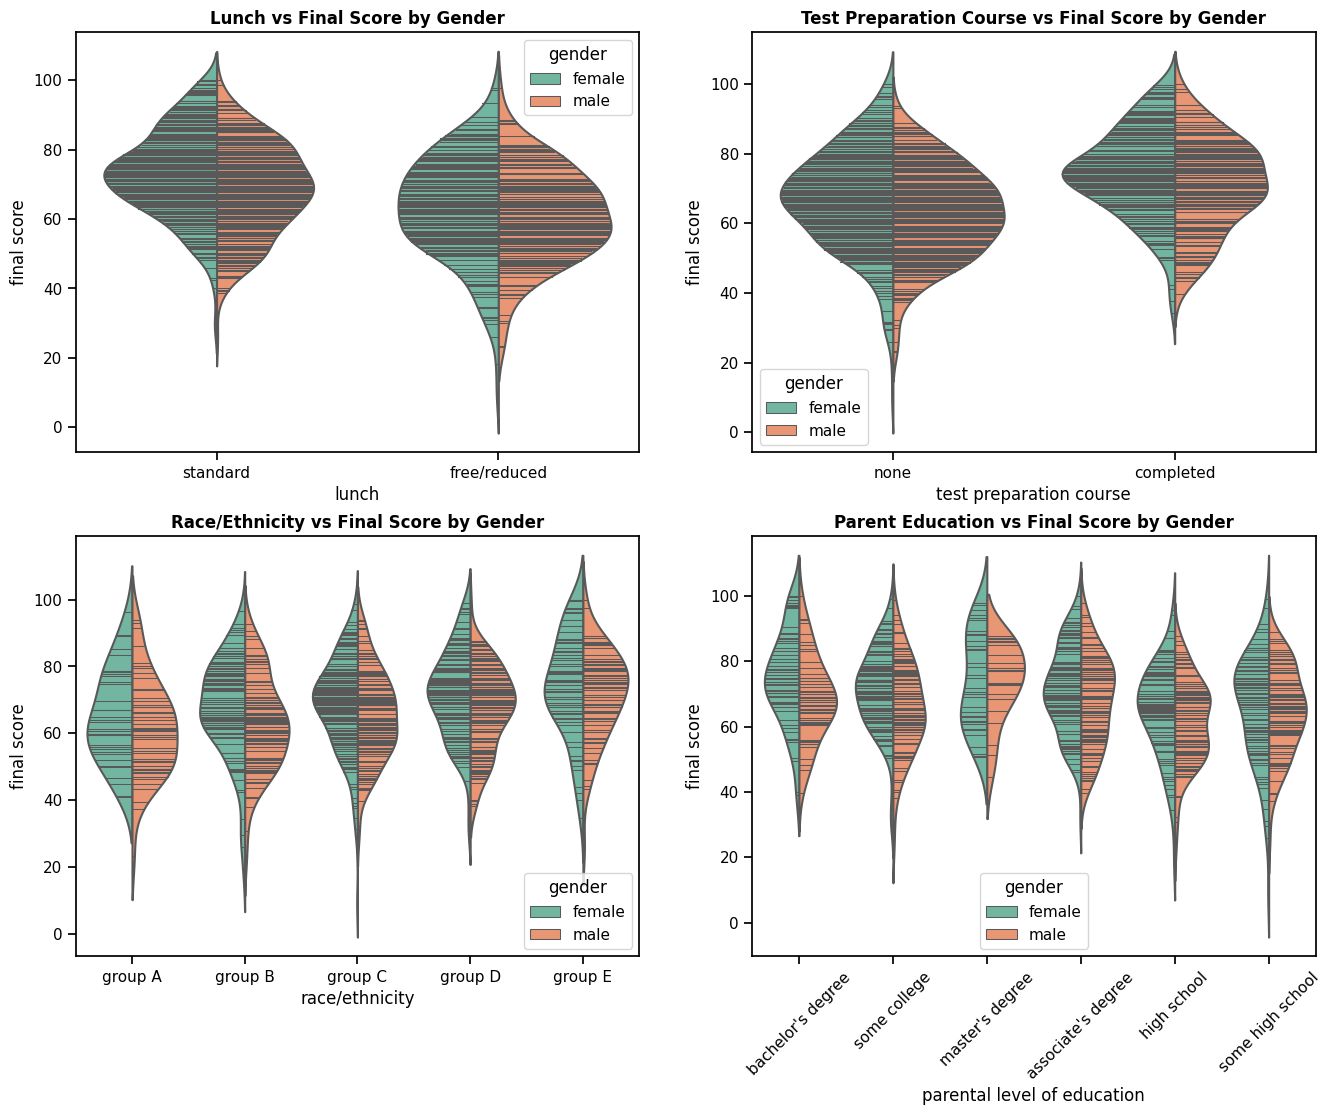

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(16,12))

sns.set_palette("Set2")

sns.violinplot(data=df, x='lunch', y='final score', hue='gender', inner='stick', split=True, ax=ax[0,0])
ax[0,0].set_title('Lunch vs Final Score by Gender', fontweight='bold')

sns.violinplot(data=df, x='test preparation course', y='final score', hue='gender', inner='stick', split=True, ax=ax[0,1])
ax[0,1].set_title('Test Preparation Course vs Final Score by Gender', fontweight='bold')

sns.violinplot(data=df, x='race/ethnicity', y='final score', hue='gender', inner='stick', split=True, ax=ax[1,0],\
               order=df['race/ethnicity'].sort_values().unique())
ax[1,0].set_title('Race/Ethnicity vs Final Score by Gender', fontweight='bold')

sns.violinplot(data=df, x='parental level of education', y='final score', hue='gender', inner='stick', split=True, ax=ax[1,1])
ax[1,1].set_xticklabels(
    ['bachelor\'s degree', 'some college', 'master\'s degree', 'associate\'s degree', 'high school', 'some high school'],
    rotation=45)
ax[1,1].set_title('Parent Education vs Final Score by Gender', fontweight='bold')

plt.show()

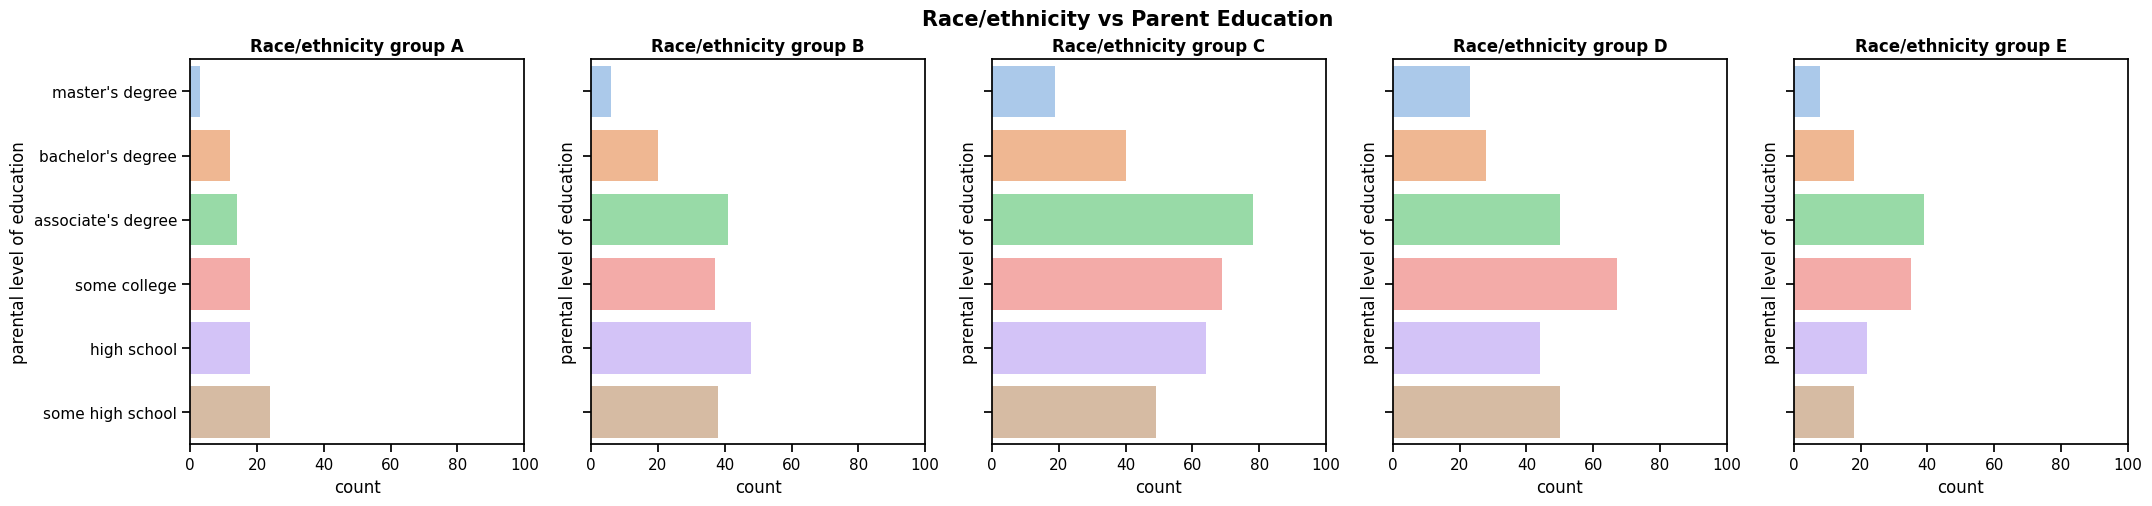

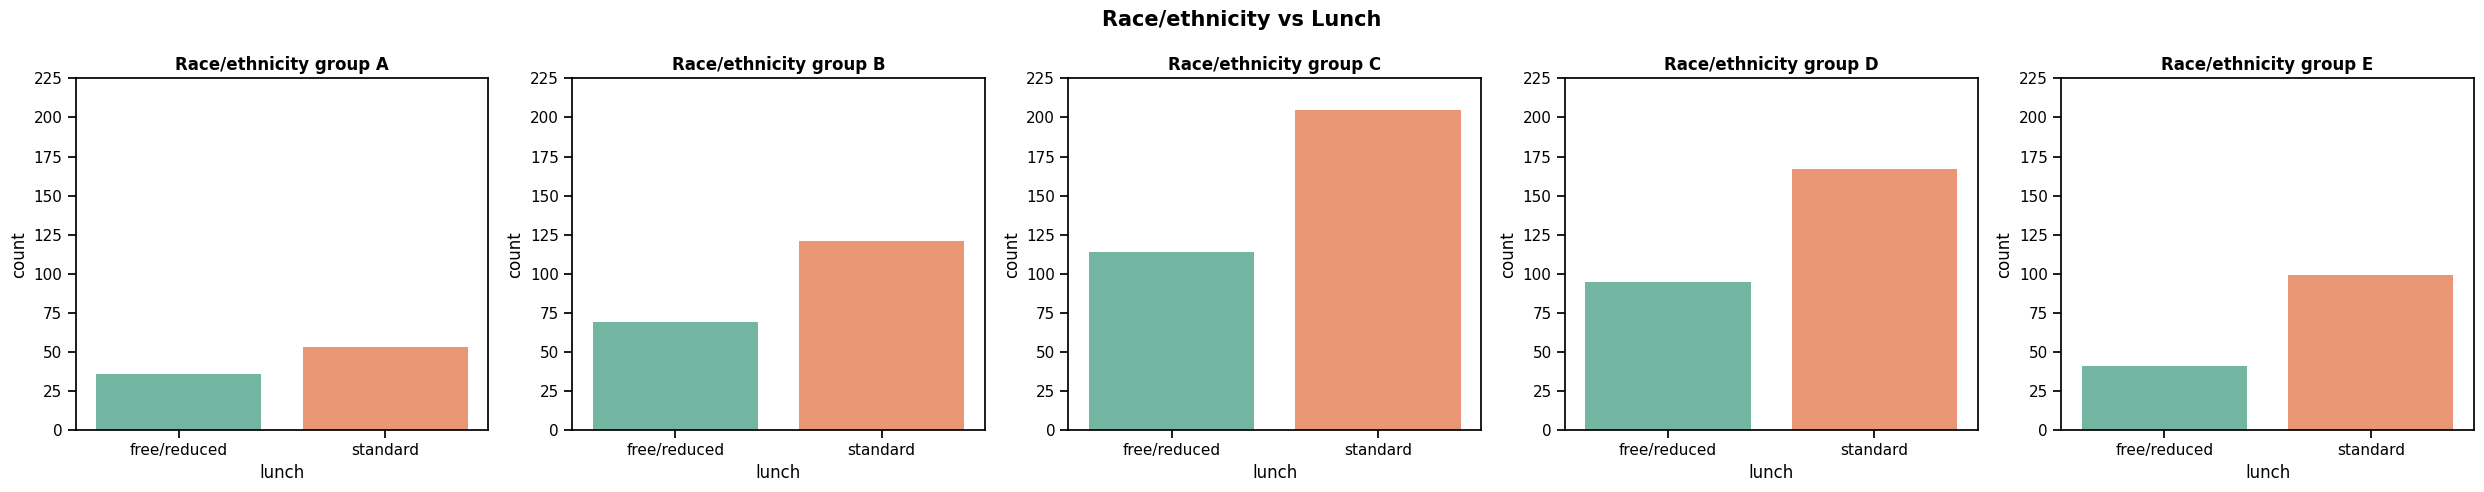

In [ ]:
races = df['race/ethnicity'].sort_values().unique()

fig, ax = plt.subplots(1,5, figsize=(25,5), sharey=True)
fig.suptitle('Race/ethnicity vs Parent Education', fontsize=15, fontweight='bold')
for col,race in enumerate(races):
    order = ['master\'s degree', 'bachelor\'s degree', 'associate\'s degree', 'some college', 'high school', 'some high school']
    sns.countplot(data=df[df['race/ethnicity'] == race], y='parental level of education', ax=ax[col], order=order, palette='pastel')
    ax[col].set_title('Race/ethnicity {}'.format(race), fontweight='bold')
    ax[col].set_xlim(0,100)

fig, ax = plt.subplots(1,5, figsize=(25,5))
fig.suptitle('Race/ethnicity vs Lunch', fontsize=15, fontweight='bold')
for col,race in enumerate(races):
    sns.countplot(data=df[df['race/ethnicity'] == race], x='lunch', ax=ax[col], palette='Set2', order=df['lunch'].sort_values().unique())
    ax[col].set_title('Race/ethnicity {}'.format(race), fontweight='bold')
    ax[col].set_ylim(0,225)

plt.tight_layout()
plt.show()

In [ ]:
print('Percentage of each race/ethnicity having a college degree')
print('---------------------------------------------------------')
college = ['master\'s degree', 'bachelor\'s degree', 'associate\'s degree']

for race in races:
    df_race = df[df['race/ethnicity'] == race]
    percentage = (len(df_race[df_race['parental level of education'].isin(college)])/len(df_race)) * 100
    print('Race/ethnicity {}: {:.2f}%'.format(race, percentage))

Percentage of each race/ethnicity having a college degree
---------------------------------------------------------
Race/ethnicity group A: 32.58%
Race/ethnicity group B: 35.26%
Race/ethnicity group C: 42.95%
Race/ethnicity group D: 38.55%
Race/ethnicity group E: 46.43%


In [ ]:
print('Percentage of each race/ethnicity having a standard lunch')
print('---------------------------------------------------------')

for race in races:
    df_race = df[df['race/ethnicity'] == race]
    percentage = (len(df_race[df_race['lunch'] == 'standard'])/len(df_race)) * 100
    print('Race/ethnicity {}: {:.2f}%'.format(race, percentage))

Percentage of each race/ethnicity having a standard lunch
---------------------------------------------------------
Race/ethnicity group A: 59.55%
Race/ethnicity group B: 63.68%
Race/ethnicity group C: 64.26%
Race/ethnicity group D: 63.74%
Race/ethnicity group E: 70.71%
